# Assignment 1 - Linear Regression



<font color="red"> <b> Due: Feb 12 (Monday) 11:00 pm </b> </font>

<font color="blue"> Shama Zabeen Shaik </font>

# Introduction

Linear Regression is the most common Supervised Learning algorithm. It helps in making easy predictions and can be used to predict the value of target variables given one or more features. For instance, this project uses the House sale pricing dataset to predict the house prices.

In this experiment, Least Squares and Least mean square models are used. These models are implemented using Python classes LinearRegress (Least Squares) and LMS (Least Mean Squares). The steps performed in the experiment are as follows:
* House sale prices for King County dataset is divided into training and test set, which are 80% and 20% respectively
* Both Least Squares and Least Mean Squares (single-step and batch) are trained on the training set and the fitting line is plotted
* Test of the model is performed using the test set and root mean square error is reported

## **DATA SET DESCRIPTION: ** ##
 

**SOURCE OF DATA :** 

The dataset is downloaded from UCI Machine Learning Repository (https://www.kaggle.com/chaitanya94/house-sales-in-king-county/data).


<font color= 'blue'> Input variables:</font> Loading Data in the form of CSV files using PANDAS </font>

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

**19 house features plus the price and the id columns, along with 21613 observations. **

The Data set has the following attributes

<font color= 'red'> Input variables:</font>

1. id ---- a notation for a house (Numeric)
2. date --- Date house was sold  (String)
3. price --- Price is prediction target (Numeric)
4. bedrooms --- Number of Bedrooms/House (Numeric)
5. bathrooms --- Number of bathrooms/bedrooms (Numeric --- sqft_living)
6. square footage of the home 
7. Date
8. Time
9. sqft_lot ---- square footage of the lot (Numeric)
10. floors --- Total floors (levels) in house (Numeric)
11. waterfront --- House which has a view to a waterfront (Numeric)
12. view --- Has been viewed (Numeric)
13. condition --- How good the condition is ( Overall )
14. Numeric --- grade overall grade given to the housing unit, based on King County grading        system (Numeric)
15. sqft_above --- square footage of house apart from basement (Numeric)
16. sqft_basement --- square footage of the basement (Numeric)
17. yr_built --- Built Year (Numeric)
18. yr_renovated --- Year when house was renovated (Numeric)
19. zipcode --- zip (Numeric)
20. lat --- Latitude coordinate (Numeric)
21. long --- Longitude coordinate (Numeric)
22. sqft_living15 --- Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area (Numeric)
23. sqft_lot15 --- lotSize area in 2015(implies-- some renovations) (Numeric)

In [305]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")

In [306]:
data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


** Changing the data format of waterfront, view, condition, grade, zipcode from <font color ='red'> "int"</font> to <font color ='red'>"categorical"</font> data type using pandas.**

In [307]:
data = pd.read_csv("kc_house_data.csv", parse_dates = ['date'])
data['waterfront'] = data['waterfront'].astype('category',ordered=True)
data['view'] = data['view'].astype('category',ordered=True)
data['condition'] = data['condition'].astype('category',ordered=True)
data['grade'] = data['grade'].astype('category',ordered=False)
data['zipcode'] = data['zipcode'].astype(str)
data.head(5) 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null category
view             21613 non-null category
condition        21613 non-null category
grade            21613 non-null category
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null object
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: category(4), datetime64[ns](1), float64(5), int64(10)

In [308]:
data.head(7) 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


<font color='blue'> **Summarizing the statistics of the data set** </font>

In [309]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
sqft_above,21613.0,1.788391e+03,8.280910e+02,2.900000e+02,1.190000e+03,1.560000e+03,2.210000e+03,9.410000e+03
sqft_basement,21613.0,2.915090e+02,4.425750e+02,0.000000e+00,0.000000e+00,0.000000e+00,5.600000e+02,4.820000e+03
yr_built,21613.0,1.971005e+03,2.937341e+01,1.900000e+03,1.951000e+03,1.975000e+03,1.997000e+03,2.015000e+03


### Checking for the missing values if any

In [310]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Since there are no missing values found, Finding the correlation of the data with respect to "PRICE"

In [311]:
corr = data.corr()
print(corr["price"].sort_values(ascending = False))

price            1.000000
sqft_living      0.702035
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
long             0.021626
id              -0.016762
Name: price, dtype: float64


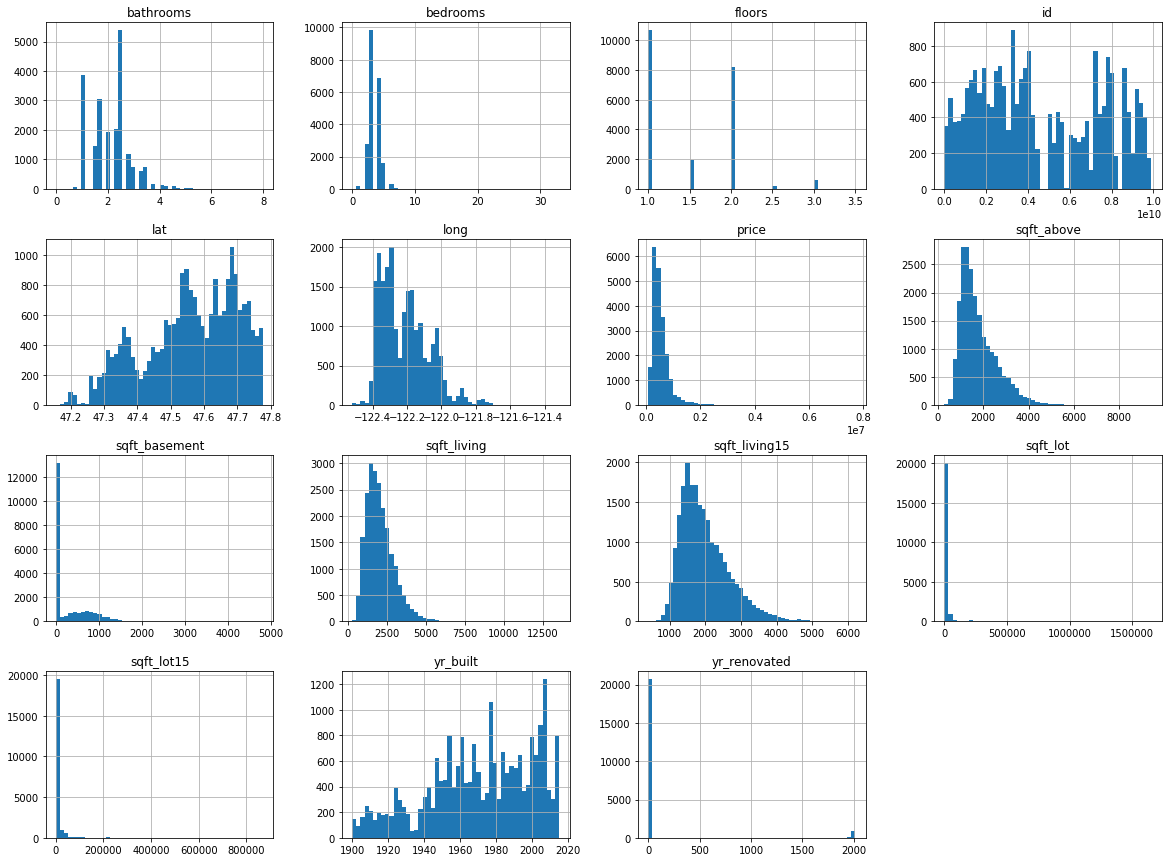

In [312]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

The histograms clearly show that there is a lot of skeweness in the data. In order to n=make the data normalized and remove the skeweness, let's apply log transforms to the data and make it more normalized and less skewed.

In [313]:
#applying log transformation
data['price'] = np.log(data['price'])

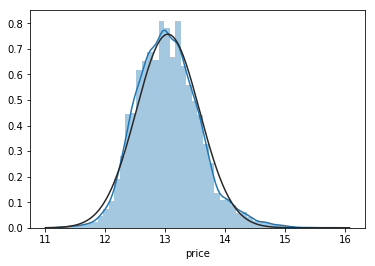

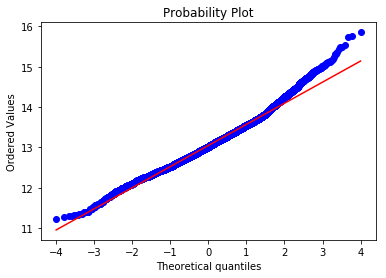

In [314]:
#histogram and normal probability plot
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import seaborn as sns
sns.distplot(data['price'], fit = norm);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

As the Data is right Skewed, we can apply log transforms to make the data less skewed. This is done on the geometric mean of the data that was calculated in the step above.

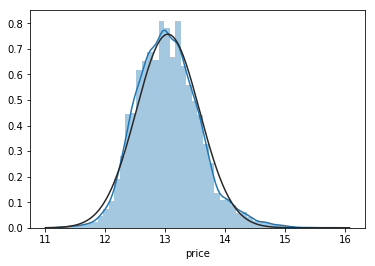

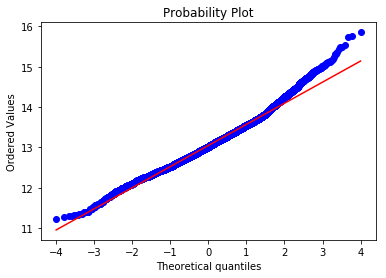

In [315]:
sns.distplot(data['price'], fit = norm);
fig = plt.figure()
res = stats.probplot(data['price'], plot=plt)
plt.show()

Now since the Skeweness of the data is reduced by a little, we can go ahead with furthur process of visualizations on the skewed data.

### BOXPLOT FOR the distribution of "PRICE"

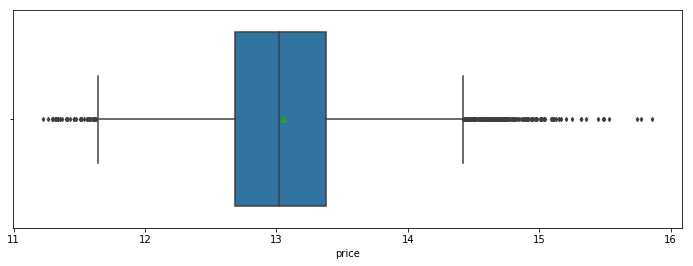

In [316]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,4))
sns.boxplot(x = 'price', data = data, orient = 'h', width = 0.8, 
                 fliersize = 3, showmeans=True, ax = ax)
plt.show()

### The distribution of the target column (price) using a boxplot.

Analyzing the relationship between the square foot of a house (sqft_living) and its selling price. Since the two variables are measured on a continuous scale, we can use Pearson's coefficient r to measures the strength and direction of the relationship.

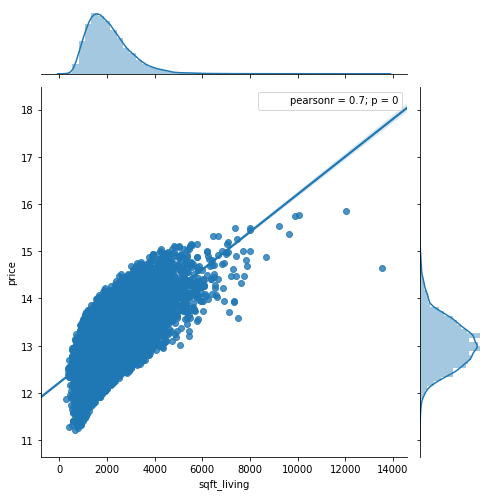

In [317]:
sns.jointplot(x="sqft_living", y="price", data=data, kind = 'reg', size = 7)
plt.show()

** For example, let's analyze the relationship between the square footage of a house (sqft_living) and its selling price. Since the two variables are measured on a continuous scale, we can use Pearson's coefficient r to measures the strength and direction of the relationship.** 
<font color='purple'>
There is a linear relation between the variables (r = 0.7), indicating a strong positive relationship. sqft_living should be a good predicator of house price. 

The sq_foot livinf is right skewed.

Finding the pearson coefficeient of the following variables in the same way as follwed above :<br>

sqft_lot<br>
sqft_above (i.e., sqft_above = sqft_living - sqft_basement)<br>
sqft_basement<br>
sqft_living15, the average house square footage of the 15 closest neighbours<br>
sqft_lot15, the average lot square footage of the 15 closest neighbours<br>
yr_built<br>
yr_renovated<br>
lat<br>
long<br>

</font>

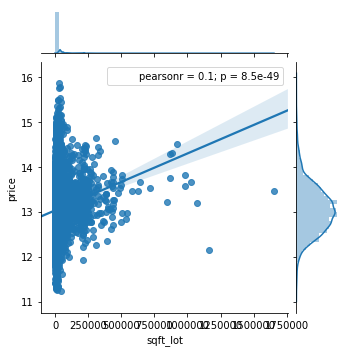

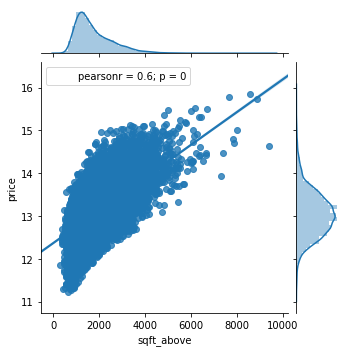

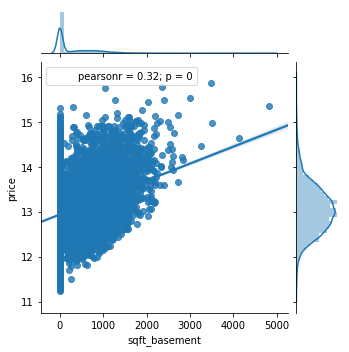

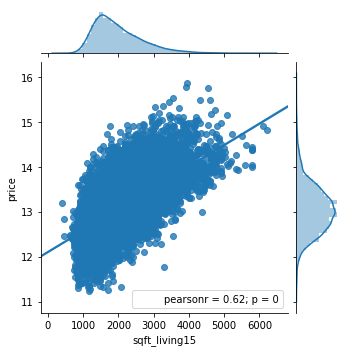

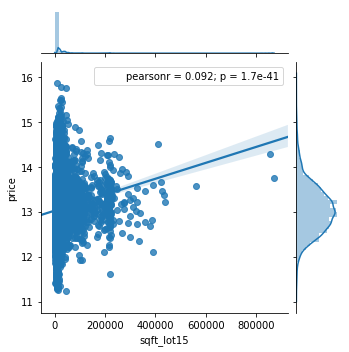

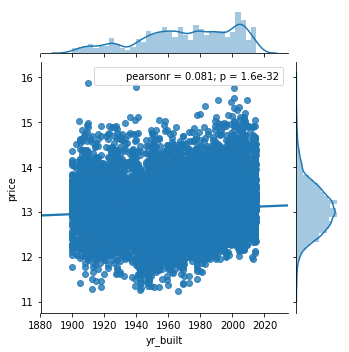

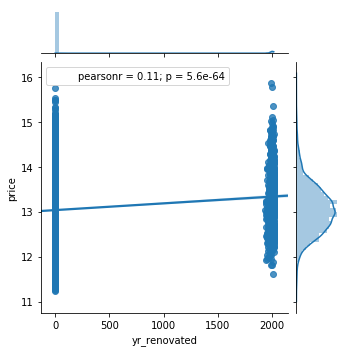

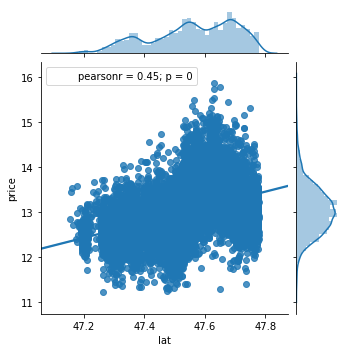

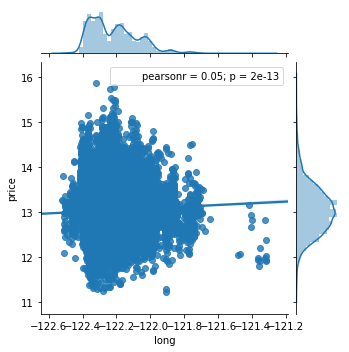

In [318]:
import seaborn as sns
sns.jointplot(x="sqft_lot", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_above", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_basement", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_living15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="sqft_lot15", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_built", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="yr_renovated", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="lat", y="price", data=data, kind = 'reg', size = 5)
sns.jointplot(x="long", y="price", data=data, kind = 'reg', size = 5)
plt.show()

*** We can observe that yr_built, sqft_lot are weekly related to price. 
The Zeros in the sqft_basement refers to no basement.
And the zeros in the yr_renovated means it was never renovated. ***


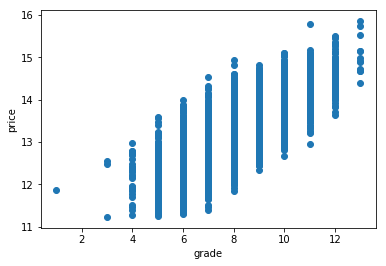

In [319]:
import matplotlib.pyplot as plt
plt.scatter(data['grade'],data['price'])
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

** This scatter plot has a direct relationship with the price and the grade. We can observe that the increase in the grade is creating an increase in the price. **

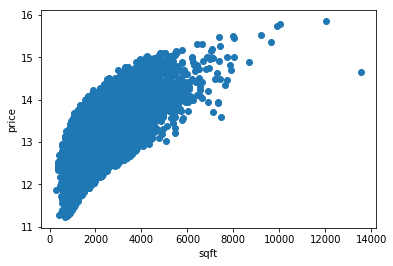

In [320]:
plt.scatter(data['sqft_living'],data['price'])
plt.xlabel('sqft')
plt.ylabel('price')
plt.show()

** From the above plotted scatter plot, we can find a clear correlation betweek the sqft of the house and the proce. That is as the sqft is increasing, the price is also increasing. **

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


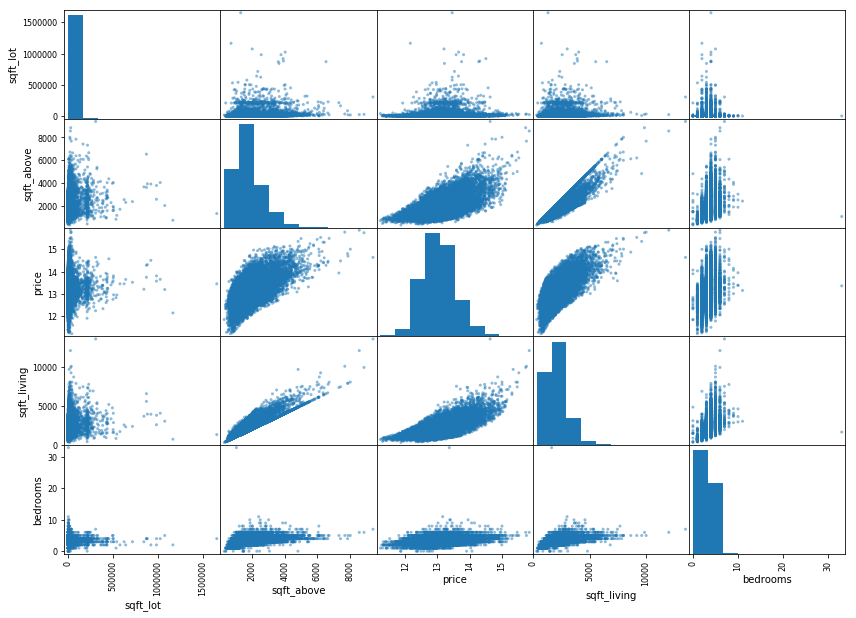

In [321]:
from pandas.tools.plotting import scatter_matrix

attributes = ['sqft_lot','sqft_above','price','sqft_living','bedrooms']
scatter_matrix(data[attributes], figsize = (14,10))
plt.show()

*** We can observe that there is a strong relation between sqft_above, sqft_living. So they have an equal impact on the price. ***

/Users/sshaik3/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


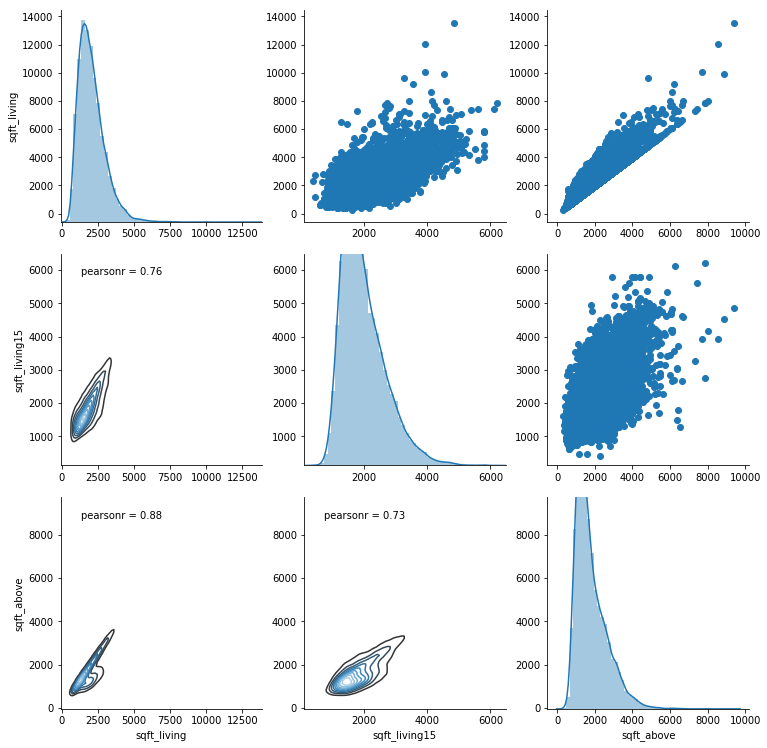

In [322]:
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("pearsonr = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(data, vars = ['sqft_living', 'sqft_living15', 'sqft_above'], size = 3.5) # define the pairgrid
g.map_upper(plt.scatter) 
g.map_diag(sns.distplot)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)
plt.show()

### PEARSON COEFFICIENT 




<font color = 'purple'>
**
From the above graph, we can observe that there is a strong positive corelation between most of the attributes. We can state that the sqft-livng and sqft_basement share the same relation as that of sqft_above leaving the same impact on the price.
**
</font>

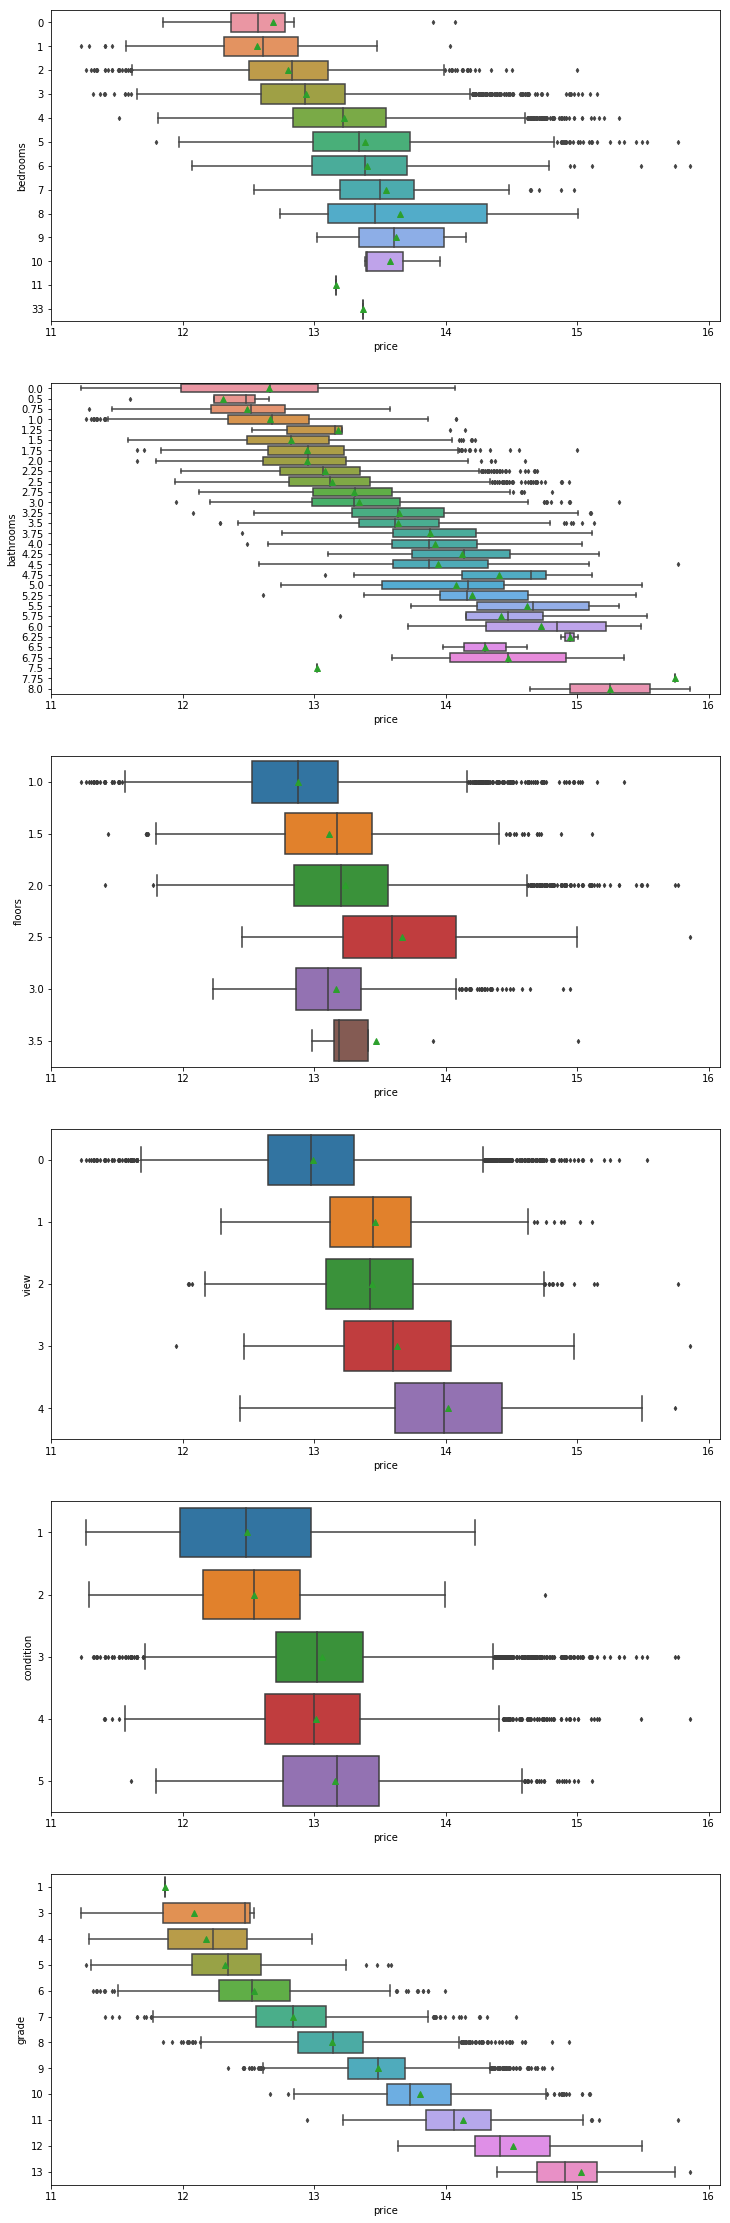

In [323]:
fig, axarr = plt.subplots(6, figsize=(12,40))
sns.boxplot(y = 'bedrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])
sns.boxplot(y = 'bathrooms', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])
sns.boxplot(y = 'floors', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])
sns.boxplot(y = 'view', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[3])
sns.boxplot(y = 'condition', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[4])
sns.boxplot(y = 'grade', x = 'price', data = data,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[5])
plt.show()

*** Despite the fact that there are a few outliers left in the data set, We can find from the above plot that there is a strong corelation between the attributes plotted with respect to price. ***

In [324]:
from IPython.display import display, Math, Latex

# Method


## Linear Models
A Linear Model helps in determining the relation between selected features and the target variable as a linear equation of the form:

$$
\begin{align}
  y = ax + b
\end{align}
$$

For vectors, it can also be illustrated as the dot product between the feature vector and the weight vector.

$$
\begin{align}
  f(x; w) &= v^\top x = \sum_0^D w_i x_i \\
     &= w_0 x_0 + w_1 x_1 + \cdots + w_D x_D
\end{align}
$$

The linearity feature of the model makes the optimization easy by using derivatives. The model limits the complexity so its representation is also limited. However, it can prevent possible overfitting with the simple modeling, especially when we have sparsely sampled data.

### Error Function / Cost Function
The error function gives a measure of how well our model has performed. It is calculated as the sum of the squares of the difference between predicted and referenced value. It can be represented as follows

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$


### Least Square
Considering the error function described in the above section, obviously the model that gives the least value for this error would be the best model.

$$
w^* = \arg\min_w \sum_{i=1}{N} \Big( f(x_i; w) - t_i \Big)^2
$$

The error function is quadratic. Therefore, to get we can get the parameters giving minimum by taking the derivating of the function and setting it to 0. This derivation gives us following relation.

$$
\begin{align}
 2 X^\top X w - 2 X^\top T  &= 0\\
\\
X^\top X w &= X^\top T\\
\\
w &= \big(X^\top X\big)^{-1} X^\top T
\end{align}
$$

#### Implementation
Implementation of this model is done in the LinearRegress class. The method "train" takes a feature matrix X and reference values Y of the training set and applies the above relation to generate weights. The weights are stored in array "w". 
The "use" method can be used to execute the trained model on the test dataset. It returns an array of projected results by performing dot product of weight vector (w) with features (X) of test dataset.


### Least Mean Square
The Least Square model uses entire dataset at one for training the model and finding the best weights. Even though it does well but it is often computationally costly, especially when we have large number of features and a very large training dataset.

In case of large dataset, *sequential* or *online* learning is preferred. In this method, the records of the dataset are fed to the training function one-by-one, which in turn update weights. Using the updated parameters, it makes a new estimation and repeat these steps. 

Initially the weight vector w is assigned with random values and it is updated as follows until convergence. 
When $k$ represents the steps for the repetition,

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th sample and $\alpha$ is a learning rate. 
This method is also called *stochastic gradient descent* or *sequential gradient descent*. 

For the $k$'th sample $v_k$, the gradient for the sum-of-squares error is

$$
\begin{align}
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} &= \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2 \\
        &= 2 \Big( f(x_k; w^{(k)}) - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( f(x_k; w^{(k)}) - t_k \Big) \\
        &= 2 \Big( {w^{(k)}}^\top x_k - t_k \Big) \frac{\partial }{\partial w^{(k)}} \Big( {w^{(k)}}^\top x_k - t_k \Big) \\
        &= 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
\end{align}
$$
This gives the following update rule for each sample:

$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$

#### Implementation
For implementation of Least Mean Square model, in the LMS class two methods are defined, namely "train" and "train_step". 
* **train_step**: This method takes a sample from the training dataset one by one and adjusts the weight vector using the above equation
* **train**: The train method calls train_step method, for each record in the training set
* **use**: The purpose of "use" method is same as in the "LinearRegress" class

### Super Classs Definition

In [325]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):

    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        
        
        """
            weight vector w is initialized as None
        """
        self.w = None

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [326]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train least-squares model
    def train(self, X, T):
        X = self.add_ones(X)
        self.w = np.linalg.lstsq(X.T @ X, X.T @ T)[0]
     
    def use(self, X):
        X = self.add_ones(X)
        return X @ self.w

### Least Mean Squares

In [327]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x, t in zip(X, T):
            self.train_step(x, t)
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        #if len(x.T.shape) !=2:
        x = np.insert(x, 0, 1).reshape(-1, 1)
            
        if self.w is None:
            self.w = np.zeros((x.shape[0],1))
            
        a = np.subtract(np.dot(self.w.T, x),t)
        b = self.alpha * a * x
        self.w = np.subtract(self.w, b)
        
        
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        t = np.dot(self.w.T , X.T)
        return t.T

### Usage Examples

In [328]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

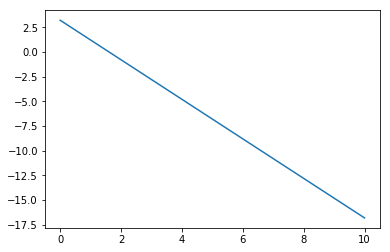

In [329]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

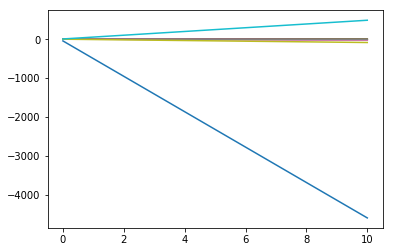

In [330]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

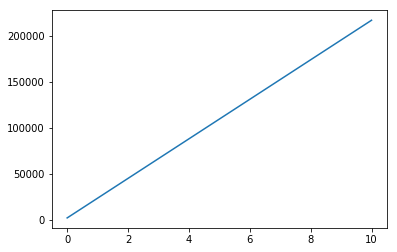

In [331]:
lms.train(X, T)
plt.plot(lms.use(X))

## Experiment  - Price vs Square Foot ( sqft_living, sqft_above, sqft_living15, bathrooms)

The experiment on the house pricing prediction model is being performed where we compare the target values with the predicted values of price using least mean square and least square.


_For experiment purpose I have taken 60% of my data to be training data and the remaining 40% of my data is test data. The models are trained using the training data and are tested on test data to predict the output. Also, as a simple quantitative measure, I have reported RMSE(root mean square error result) that compares with the actual target value scale and tells how big or small is the error._ 

In [332]:
train = data.sample(frac = .60)
test = data.sample(frac = .40)

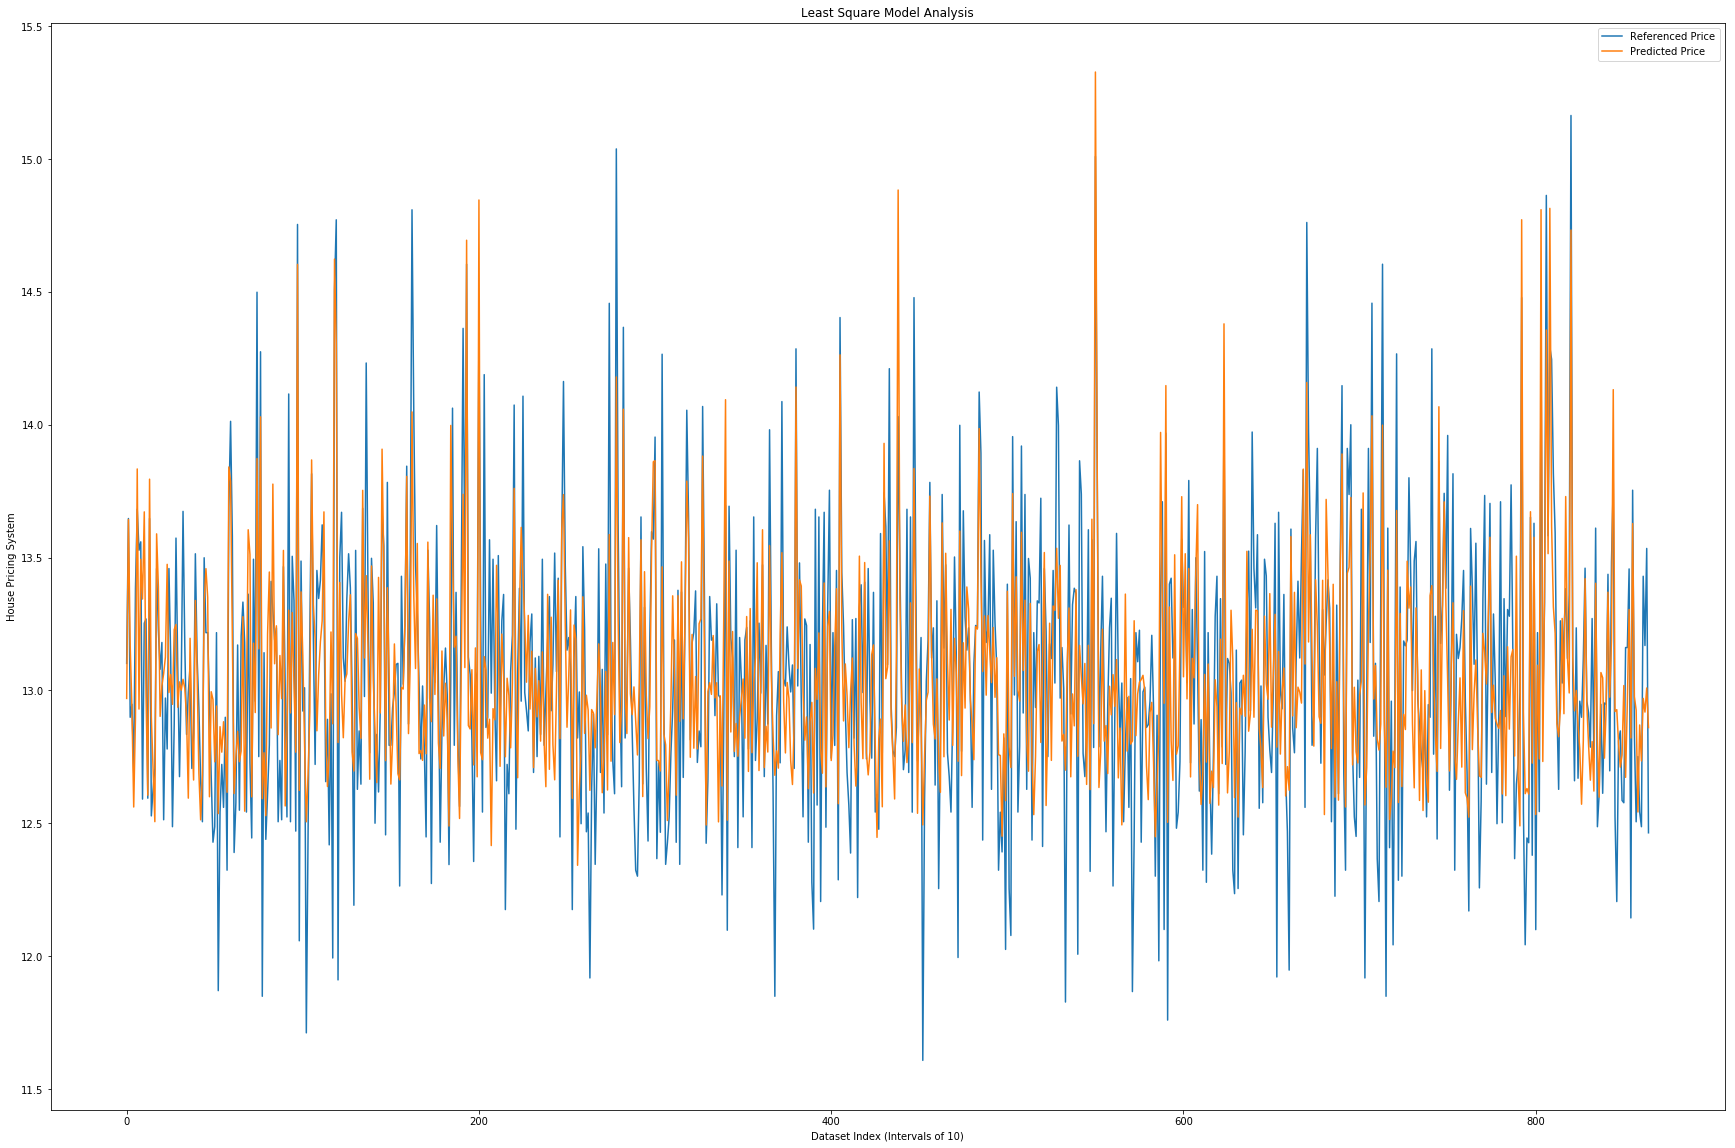

The root mean square error is: 0.8105204245293706


In [333]:
# Train Least Square Model
ls = LinearRegress()
ls.train(train[['sqft_living', 'sqft_above', 'sqft_living15', 'yr_built', 'yr_renovated']].values, train['price'].values.reshape(-1, 1))


T = ls.use(test[['sqft_living', 'sqft_above', 'sqft_living15','yr_built', 'yr_renovated']].values)
plt.figure(figsize=(30,20))
plt.title('Least Square Model Analysis')
plt.plot(test['price'].values[0::10], label='Referenced Price')
plt.plot(T[0::10], label='Predicted Price')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('House Pricing System')
plt.legend()
plt.show()

error = np.sqrt(((test['price'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(math.sqrt(error)))

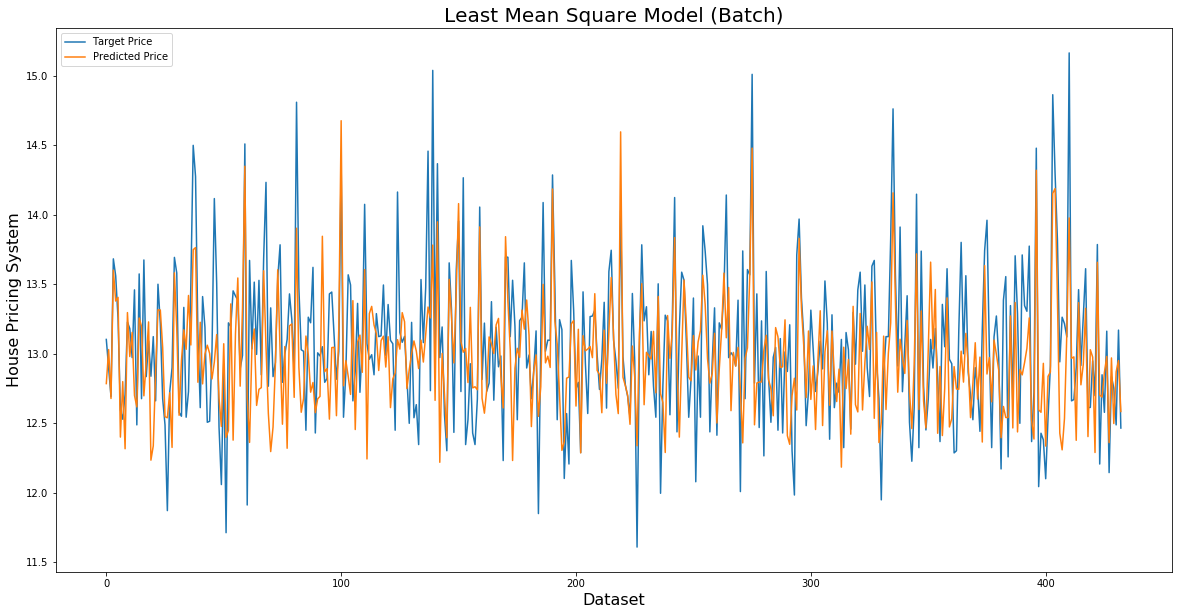

Root mean square error is: 0.8146426243469267


In [334]:

# Training with Least Mean Square Model(Batch)
lms = LMS(0.00000001)
lms.train(train[['sqft_living', 'sqft_above', 'sqft_living15', 'yr_built', 'yr_renovated']].values, train['price'].values.reshape(-1, 1))

T = lms.use(test[['sqft_living', 'sqft_above', 'sqft_living15', 'yr_built', 'yr_renovated']].values)
plt.figure(figsize=(20,10))
plt.title('Least Mean Square Model (Batch)', fontsize=20)
plt.plot(test['price'].values[0::20], label='Target Price')
plt.plot(T[0::20], label='Predicted Price')
plt.xlabel('Dataset', fontsize=16)
plt.ylabel('House Pricing System', fontsize=16)
plt.legend()
plt.show()


rmse = np.sqrt(((test['price'].values - T) ** 2).mean())
print('Root mean square error is: ' + str(math.sqrt(rmse)))

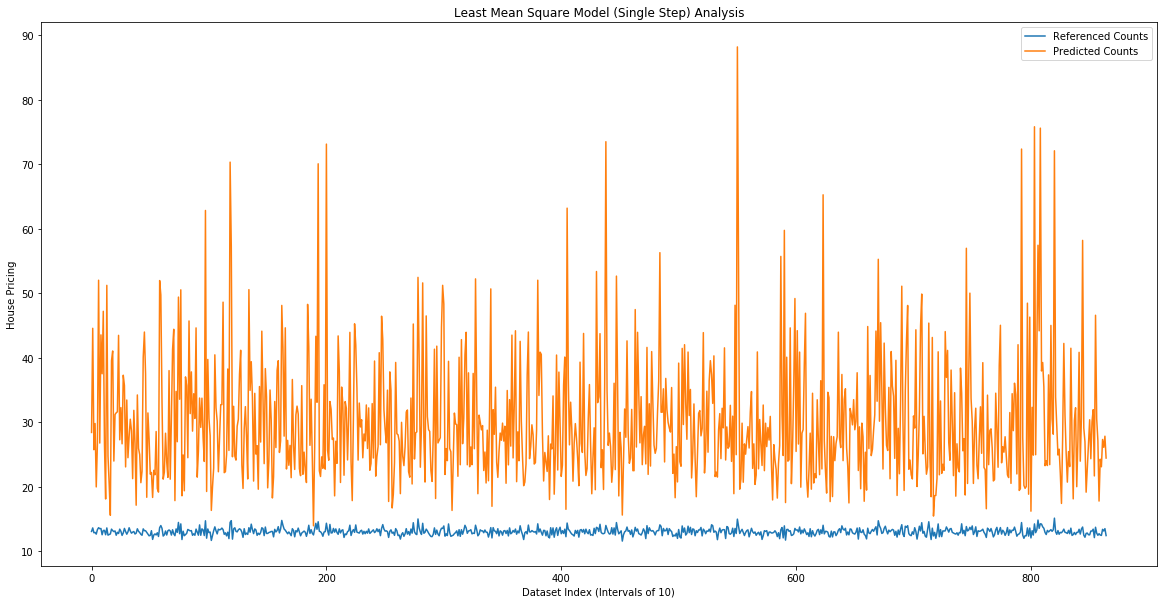

The root mean square error is: 4.418174227521101


In [335]:
# Train Least Mean Square Model (Single Step)
lms = LMS(0.0000001)
lms.train_step(train[['sqft_living', 'sqft_above', 'sqft_living15', 'yr_built', 'yr_renovated']].values[0], train['price'].values.reshape(-1, 1)[0])

T = lms.use(test[['sqft_living', 'sqft_above', 'sqft_living15', 'yr_built', 'yr_renovated']].values)
plt.figure(figsize=(20,10))
plt.title('Least Mean Square Model (Single Step) Analysis')
plt.plot(test['price'].values[0::10], label='Referenced Counts')
plt.plot(T[0::10], label='Predicted Counts')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('House Pricing')
plt.legend()
plt.show()

error = np.sqrt(((test['price'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(math.sqrt(error)))

### Analysis of algorithms
** _When we compare the above plots, we can say that the Least Square model is the most accurate model as the target value and the predicted value overlap each other the most. Least Mean Square Model(Single Step) has the highest root mean square error because it only gives the mean results and since the model is trained with very less training set the weights do not align properly. Hence, we can say that the square foot of the house and the year it was built in impact price the most_**

# Conclusions

* Helped me understand Least Square and Least Mean Square
* Pre-processing of data.
* Converting datatypes into appropriate datatype before plotting.
* Finding an appropriate visualization plot for the given set of attributes


# References

1. https://seaborn.pydata.org/tutorial/categorical.html
2. https://python-graph-gallery.com/seaborn/
3. https://seaborn.pydata.org/examples/index.html
4. http://www.scipy-lectures.org/intro/matplotlib/index.html
5. https://seaborn.pydata.org/generated/seaborn.countplot.html

# Extra Credit




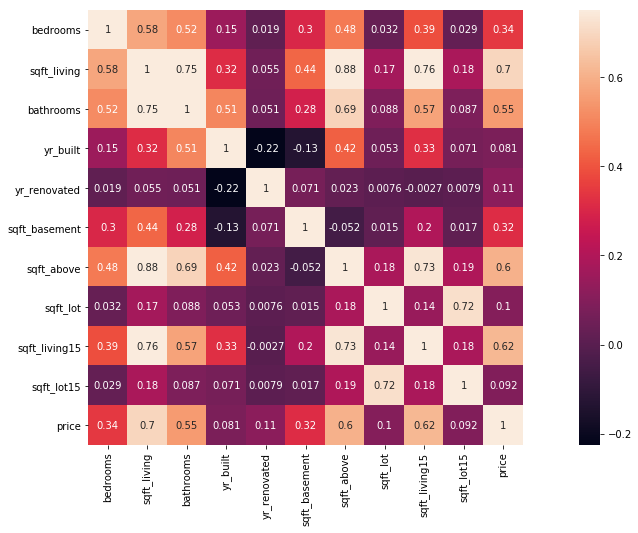

In [336]:
#correlation matrix
plt.subplots(figsize=(20,8))
corrmat=data[["bedrooms", "sqft_living", "bathrooms", "condition", "grade", "yr_built", "yr_renovated", "sqft_basement", "sqft_above", "sqft_lot", "sqft_living15", "sqft_lot15","price" ]].corr()
sns.heatmap(corrmat, vmax=.75, square=True, annot=True)
plt.show()

<font color = 'orange'> **CORRELATION MATRIX**  </font>

**The correlation matrix plotted above shows the relationship metween the attributes in terms of the heat (color). The more the heat, the stronger is the correlation. From the above matrix, we can infer that age and balance are strongy co-related.**
<font color='blue'>
From the above plotted correlation matrix, we can infer that: 
The sqft_living has the heighest impact on the price of the house.
followed by which is the sqft_above that refers to the sqft_of the floor above the basefloor.
We can also infer that, the year in which the house was built doesn't really effect the price, considering that there are other features like the renovation, sqft of the house, the number of bath rooms are requiredly high.</font>

_Plotting correlation matrix between Price and other features to see how these features influence the dependent variable Price._
* Sq_ft living(The living area square foot) has a highest positive correlation with Price, followed by Sq_ft living
* Feature such as sq_ft_lot has the highest negative impact on the dependent variable Price followed by sq_ft_lot_15
* condition, yr_built, sqft_lot, sqft_lot15 do not have significant impact on our dependent variable. One reason why these feature don't have much impact on the price can be seen from the data plot plotted in understanding the data. 

Hence , we can say that the most important features in House Pricing System are Sq_ft living, sqft_living15, grade, sqft_above where as condition, yr_built, sqft_lot, sqft_lot15 are less important feature.


** To prove the above hypothesis, we can plot two Least Square graphs(I am using Least Square Model because it gave the best prediction for the dataset) one with important features removed and in other less important features removed and compare them to our Least Square Model results **

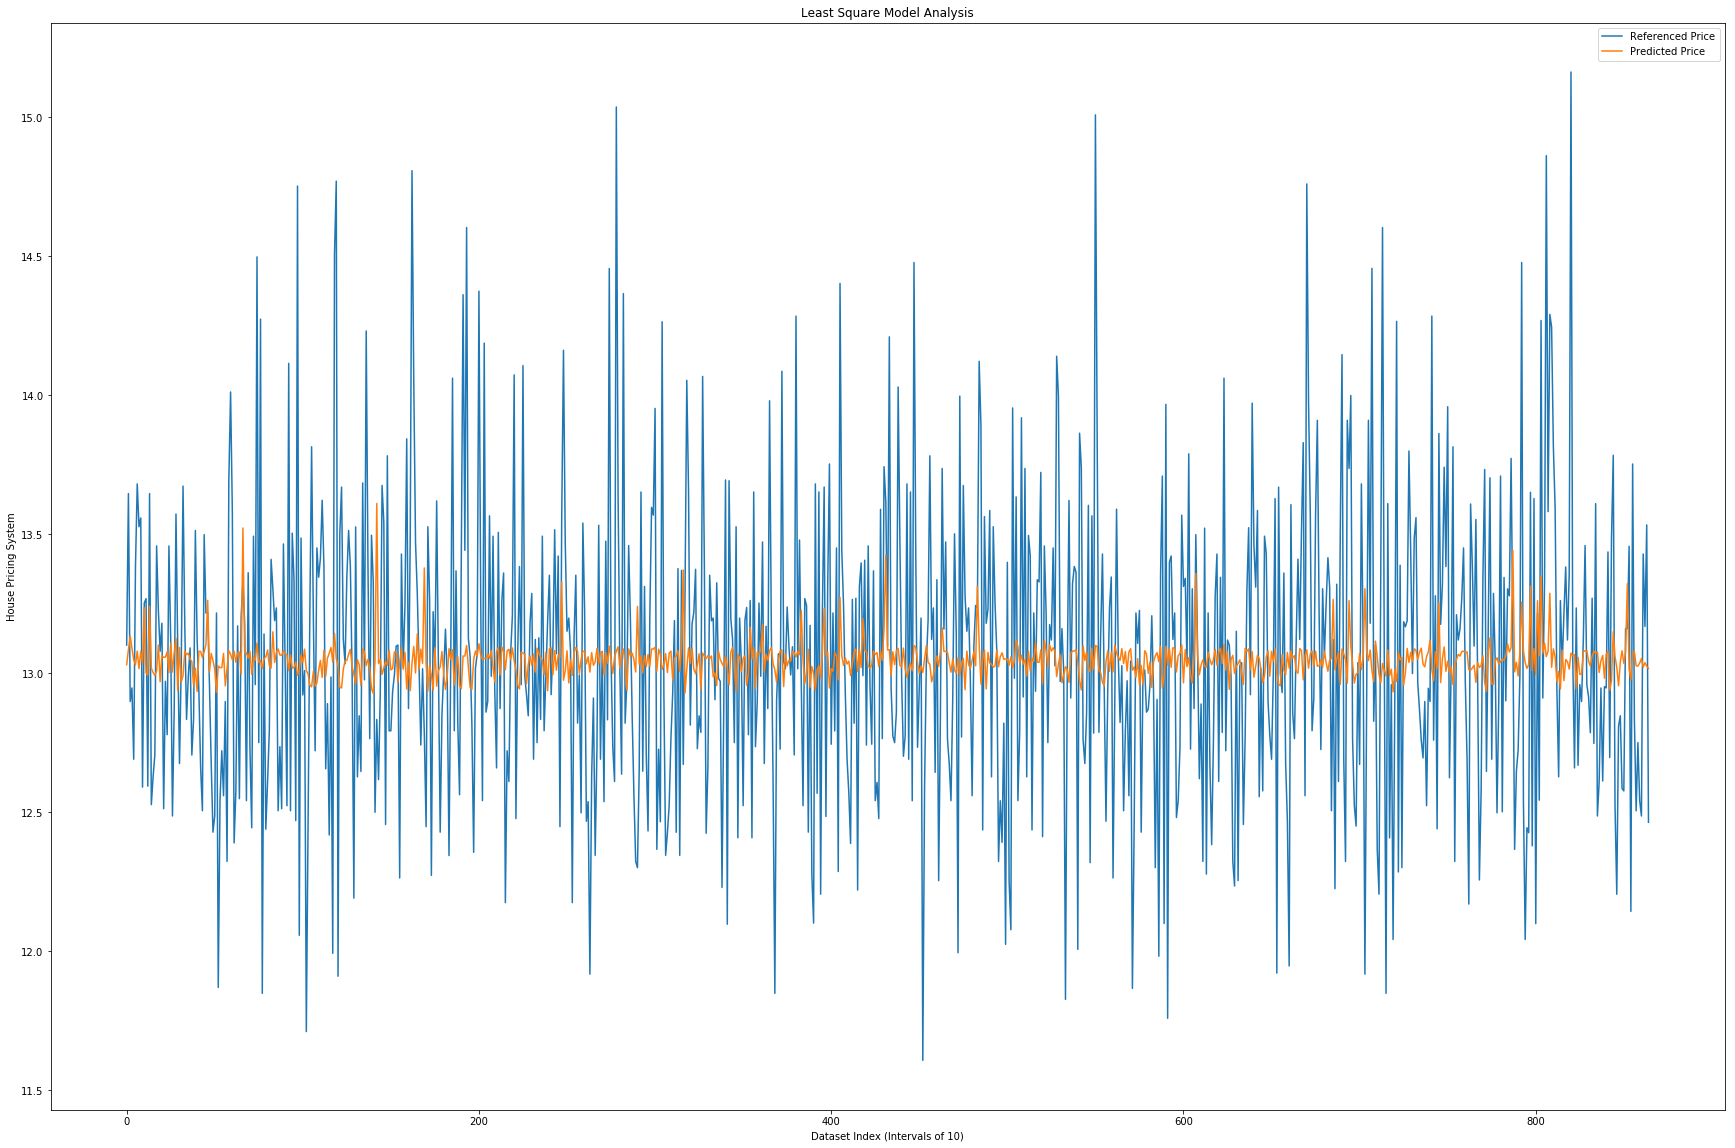

The root mean square error is: 0.7289080629442616


In [338]:
# Train Least Square Model
ls = LinearRegress()
ls.train(train[['yr_built', 'sqft_lot', 'sqft_lot15']].values, train['price'].values.reshape(-1, 1))


T = ls.use(test[[ 'yr_built', 'sqft_lot', 'sqft_lot15']].values)
plt.figure(figsize=(30,20))
plt.title('Least Square Model Analysis')
plt.plot(test['price'].values[0::10], label='Referenced Price')
plt.plot(T[0::10], label='Predicted Price')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('House Pricing System')
plt.legend()
plt.show()

error = np.sqrt(((test['price'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(math.sqrt(error)))

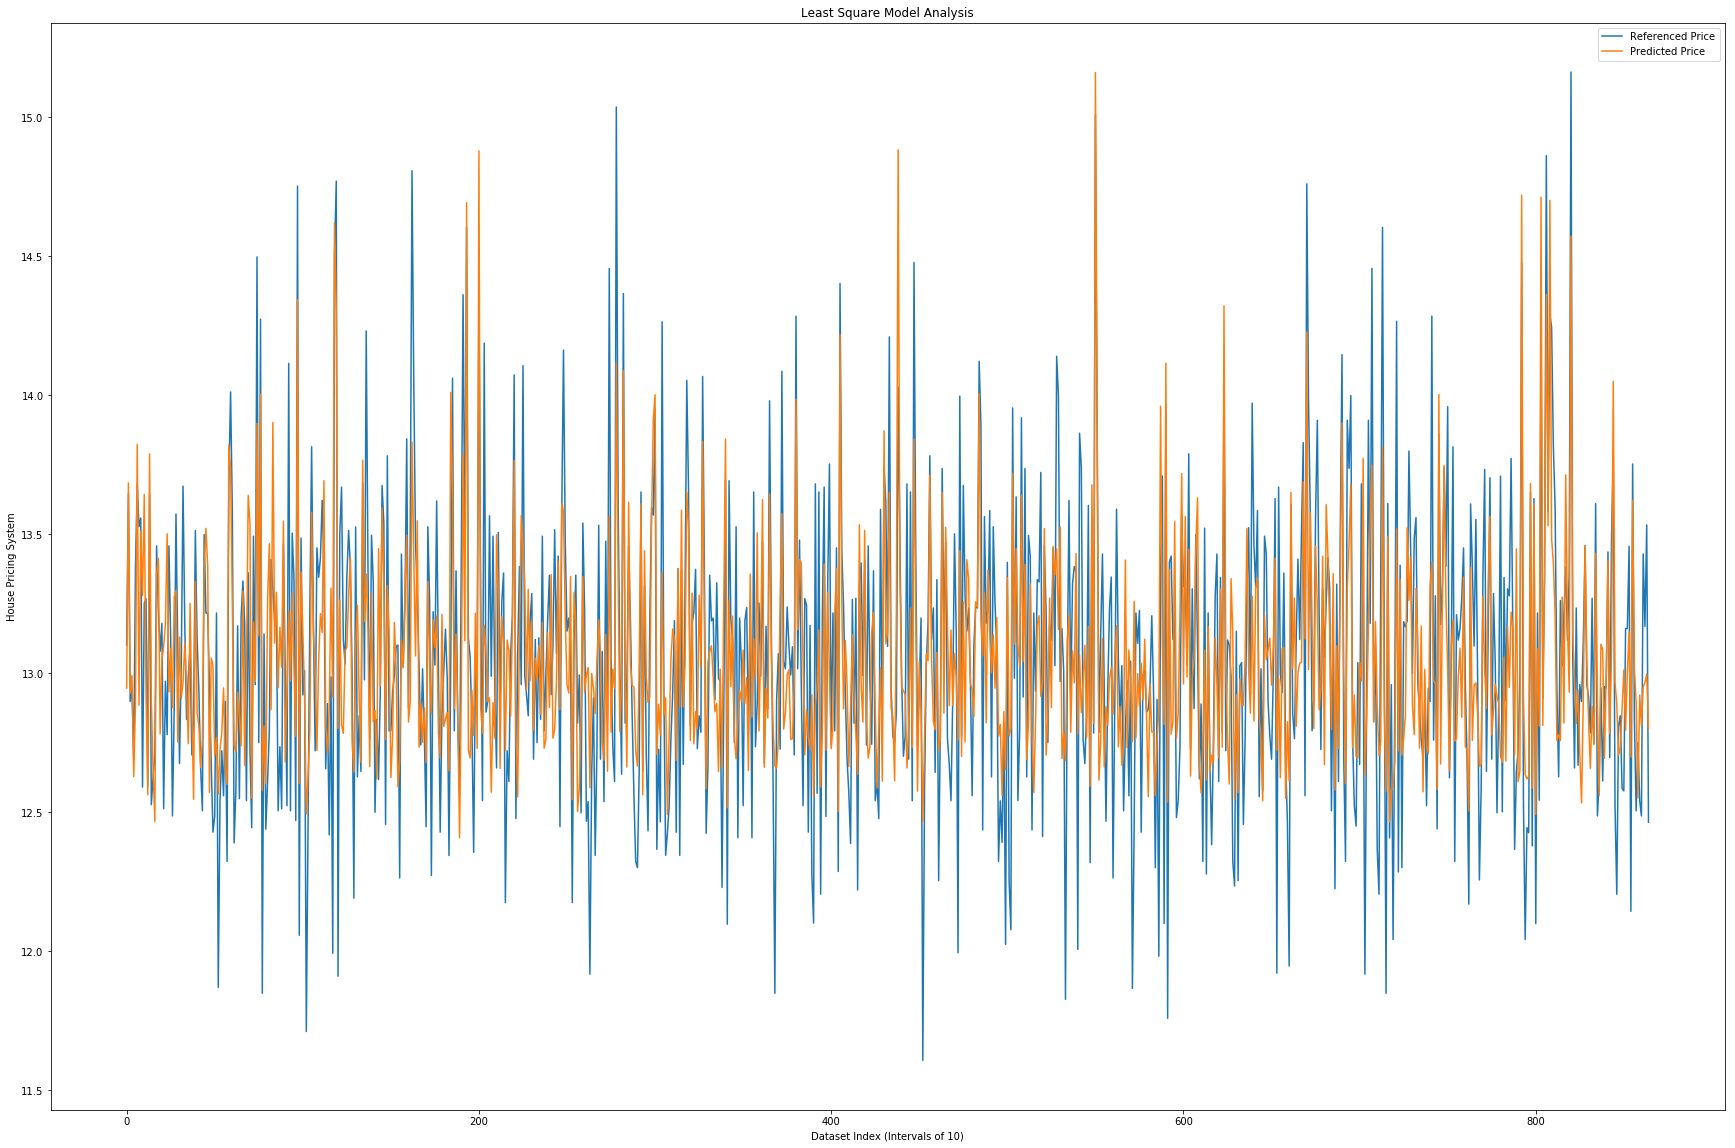

The root mean square error is: 0.8069335138733147


In [341]:
# Train Least Square Model
data = pd.read_csv("kc_house_data.csv")
ls = LinearRegress()
ls.train(train[['sqft_living15', 'sqft_living', 'sqft_above']].values, train['price'].values.reshape(-1, 1))


T = ls.use(test[['sqft_living15', 'sqft_living', 'sqft_above']].values)
plt.figure(figsize=(30,20))
plt.title('Least Square Model Analysis')
plt.plot(test['price'].values[0::10], label='Referenced Price')
plt.plot(T[0::10], label='Predicted Price')
plt.xlabel('Dataset Index (Intervals of 10)')
plt.ylabel('House Pricing System')
plt.legend()
plt.show()

error = np.sqrt(((test['price'].values - T) ** 2).mean())
print('The root mean square error is: ' + str(math.sqrt(error)))

** Hence we can say that if we remove the most significant features the there is a huge difference in the predicted values and the target values. Therefore, it is important to have relevant/important features in a dataset to predict the outcome correctly.**

# Preliminary Test

In [342]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 